In [ ]:
%matplotlib inline
from marketdata import *
from model import *
from trading import * 
from analytics import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from datetime import datetime

import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

# Load data 


In [ ]:
FundAUM=1e9
mkts=get_market_list()
df=pd.DataFrame()
for m in mkts:
    try:
        df[m]=get_timeseries(m)
    except:
        print m

# Charts for email to be sent once data is gathered and signals calculated

In [98]:
sh=10
lg=80
pos=tsmom_daily(df[mkts],sh)
pnl_short=calc_pnl_wc(pos,df[mkts])
pos=tsmom_daily(df[mkts],lg)
pnl_long=calc_pnl_wc(pos,df[mkts])
combined_pnl=(pnl_short*.5+pnl_long*.5)
scaling_factor=calc_scaling_factor(combined_pnl)
s_short=tsmom_daily_signal(df,sh)
s_long=tsmom_daily_signal(df,lg)
s_combined = (s_short*.60+s_long*.40)
lots=calc_position(s_combined,FundAUM,scaling_factor,curr_px)

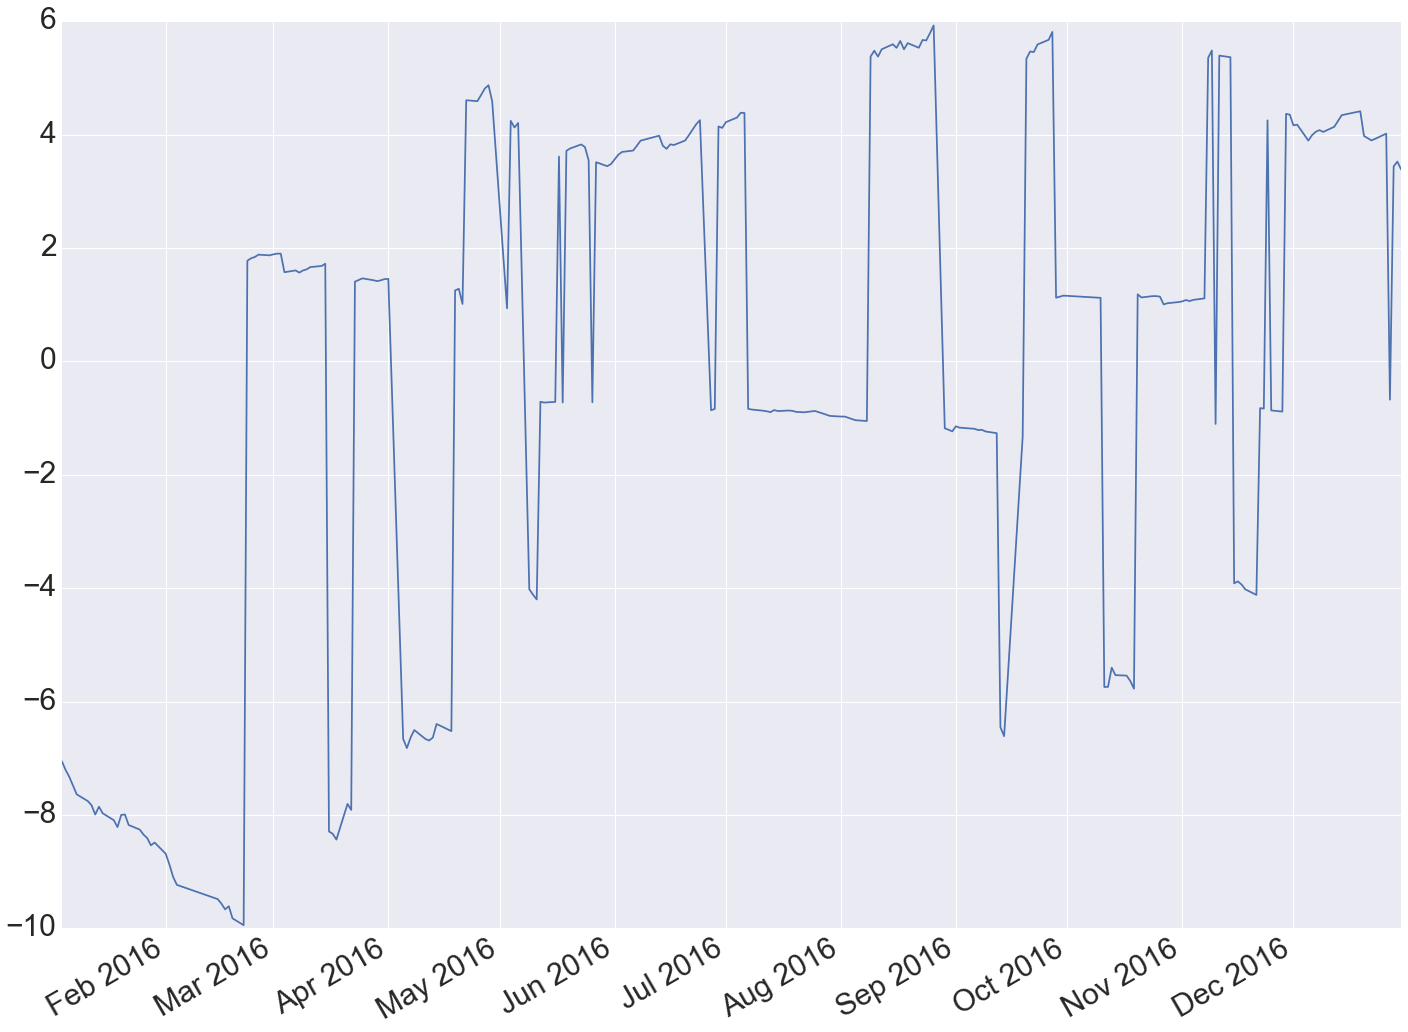

In [99]:
s_combined.A.dropna()['2016'].plot()

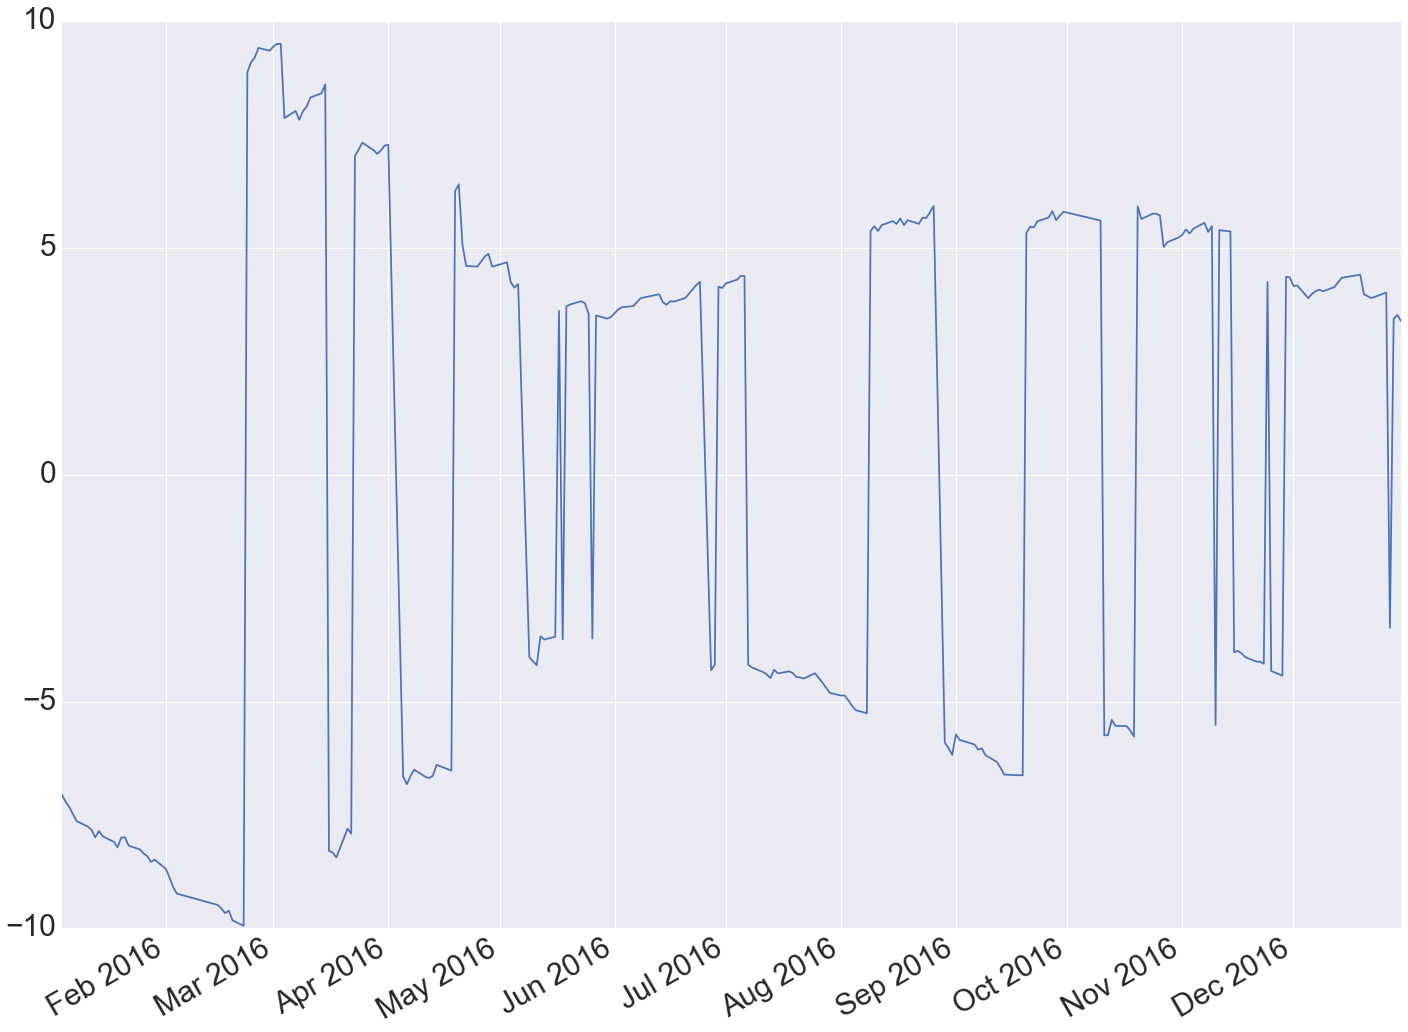

In [100]:
s_short.A.dropna()['2016'].plot()

In [101]:
lots

,A,AG,AL,AU,B,BU,C,CF,CS,CU,...,NI,P,PB,PP,RB,RM,SN,SR,TA,V
2003-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
PNL = calc_pnl_position_wc(lots,df,curr_px)

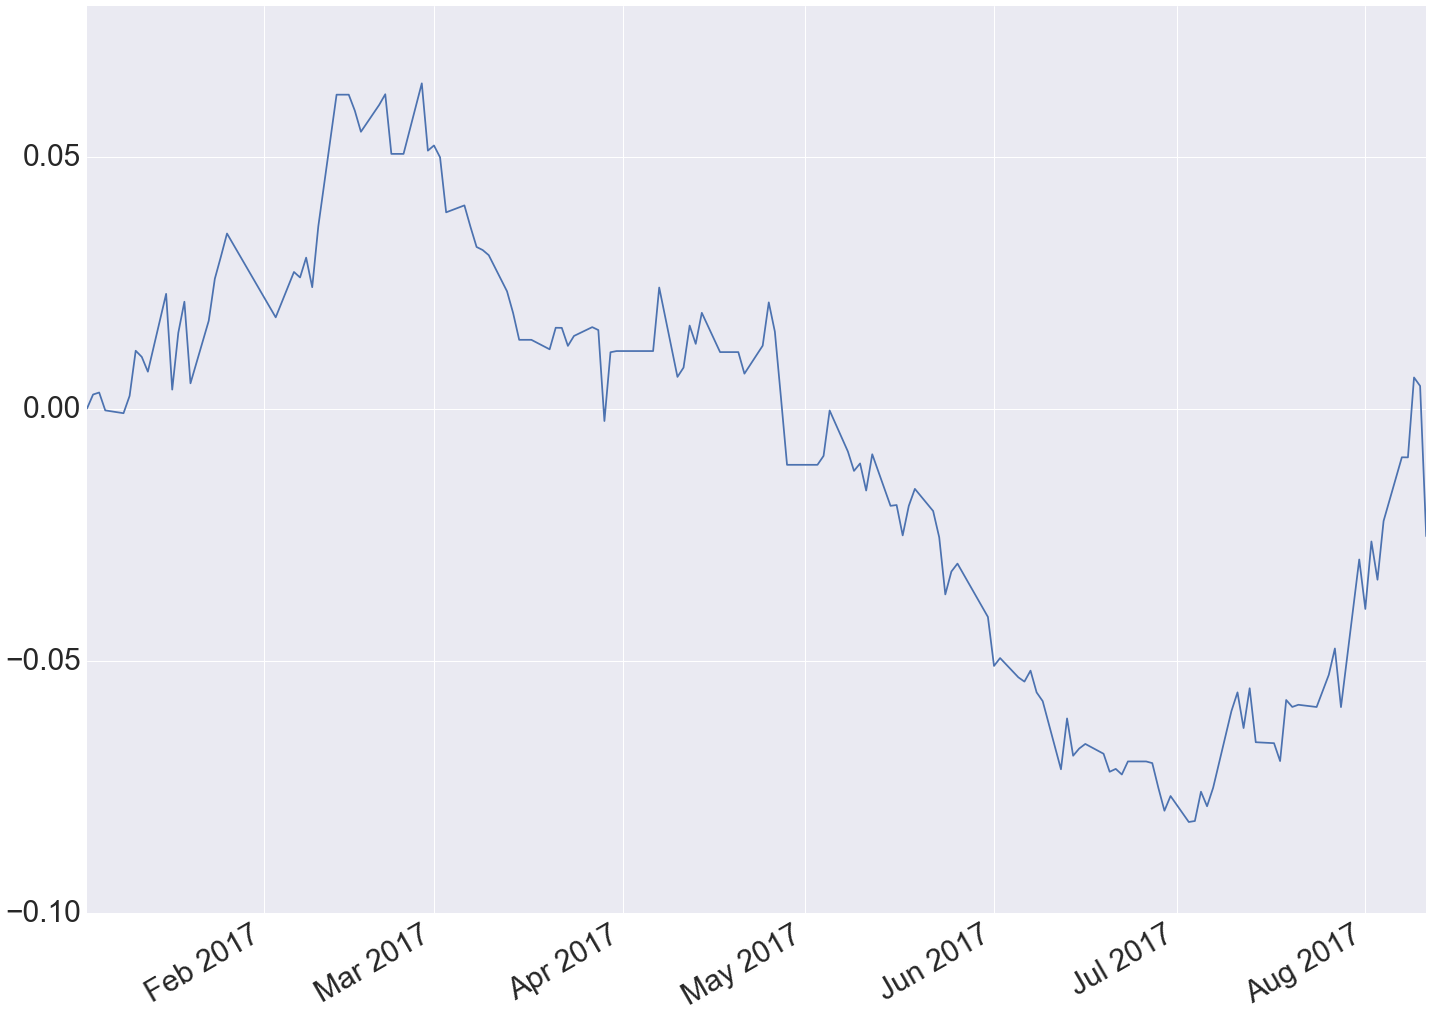

In [47]:
(PNL['2017']/FundAUM).cumsum().ffill().sum(axis=1).plot()

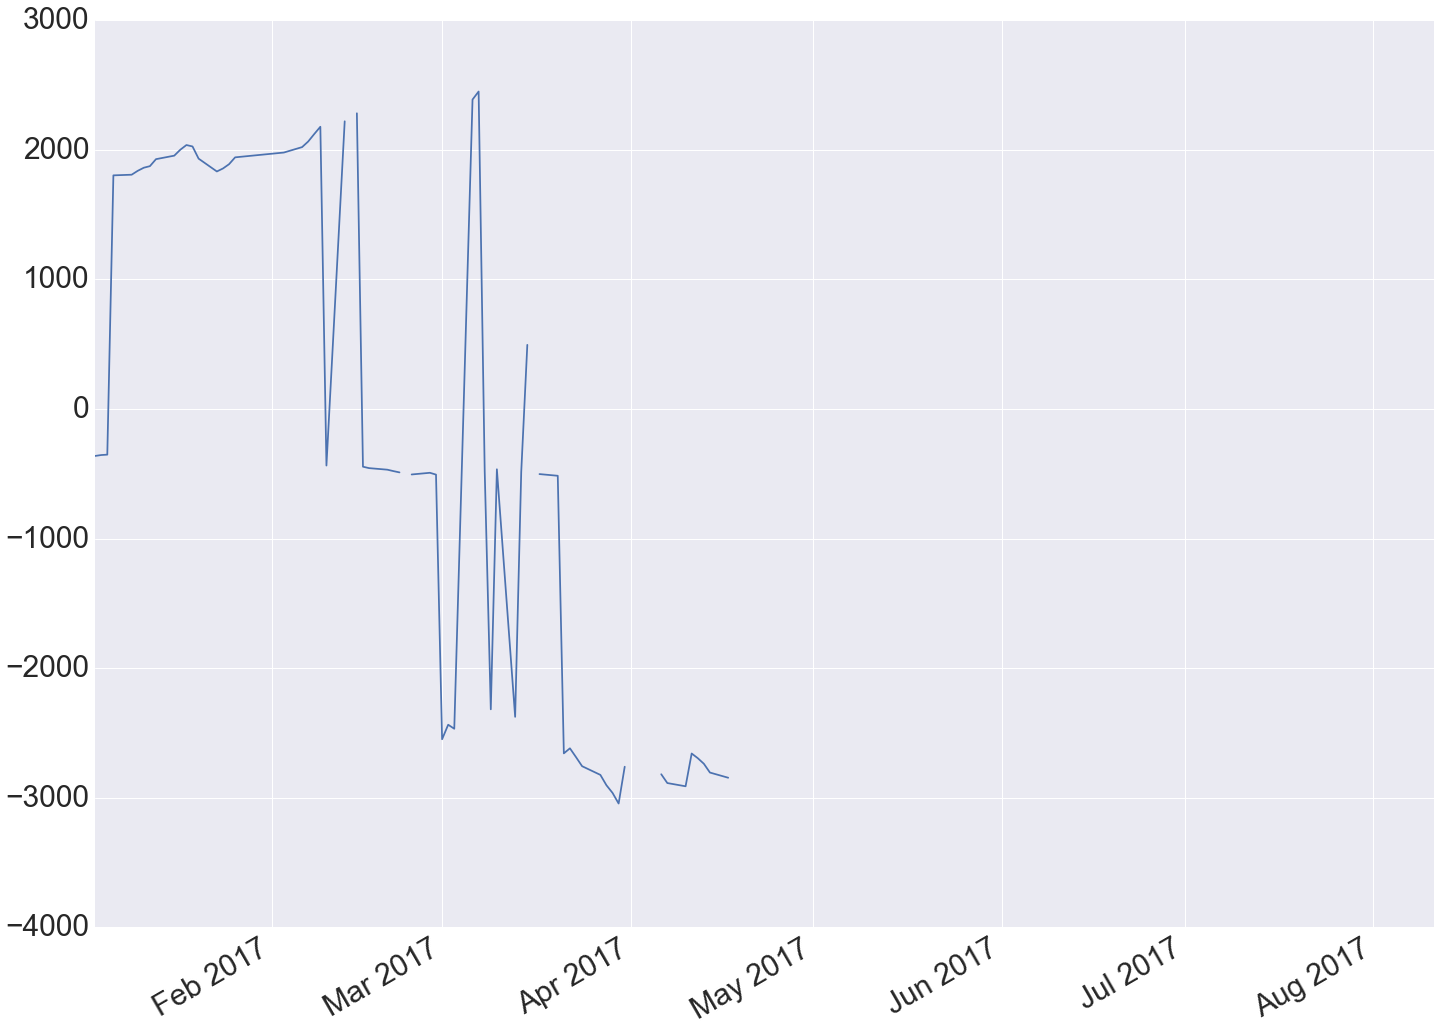

In [54]:
lots.SR['2017'].plot()

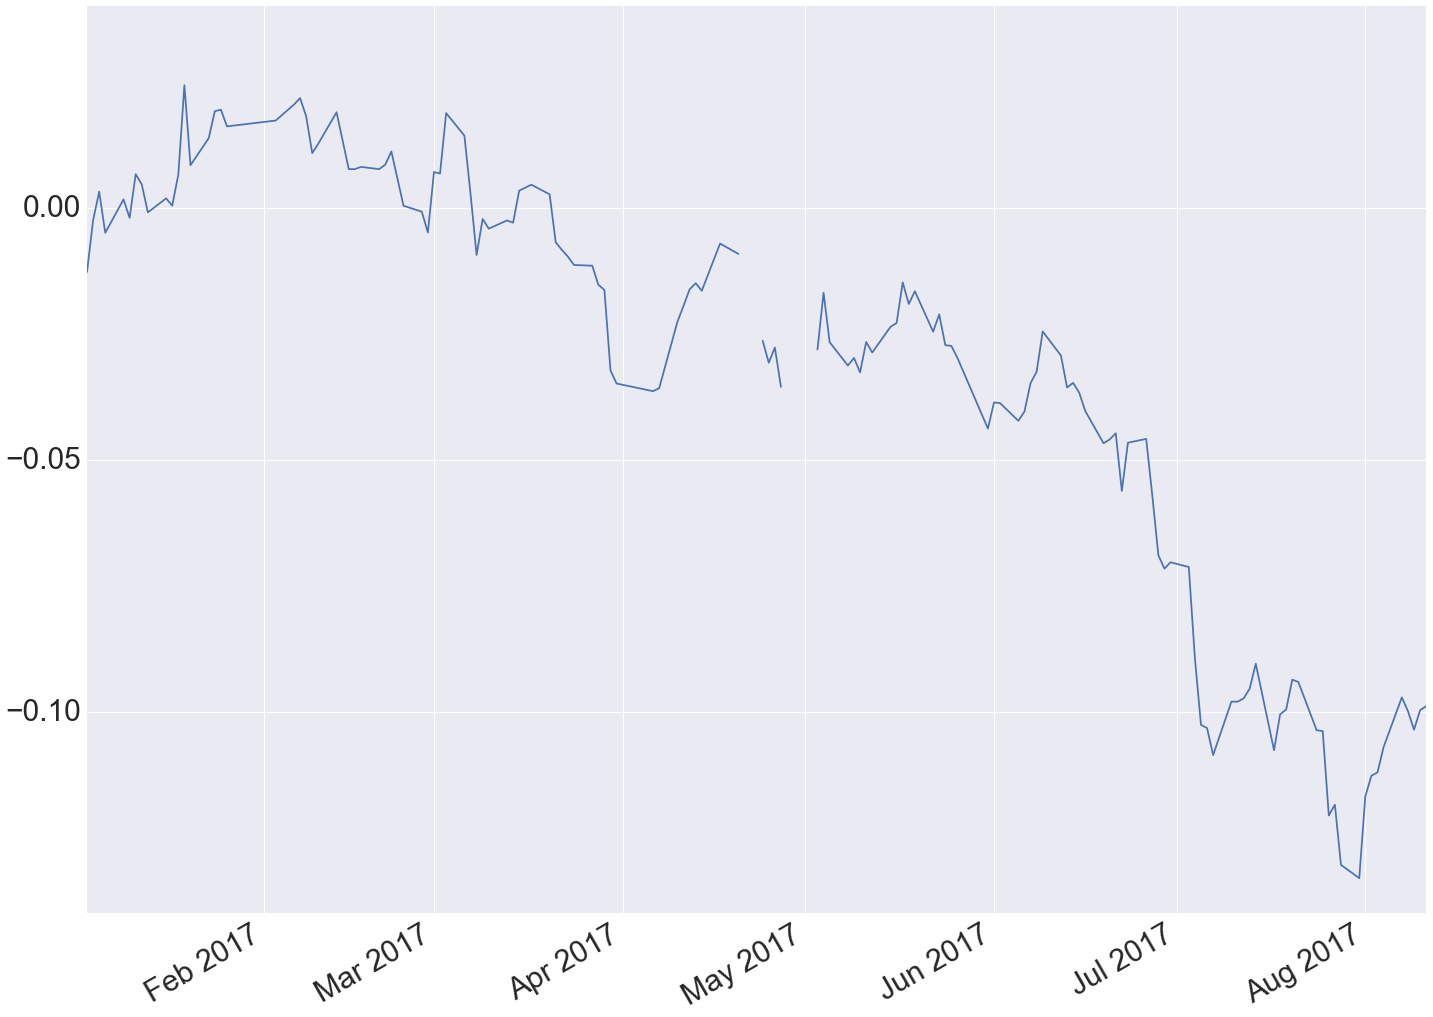

In [52]:
df.SR['2017'].cumsum().plot()

In [75]:
signal_lookback=80
vol_lookback=20

In [76]:
vol=pd.ewmstd(df,vol_lookback,min_periods=vol_lookback)*math.sqrt(256)
signal=pd.rolling_mean(df,signal_lookback)
signal = signal /abs(signal)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: pd.ewm_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=20,adjust=True,com=20).std(bias=False)
  if __name__ == '__main__':
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=80,center=False).mean()
  from IPython.kernel.zmq import kernelapp as app


In [85]:
x=df.SR['2017-04-21':'2017-04-28']

In [91]:
x=load_market_price('SR')['2017-04-21':'2017-04-28'].dropna(axis=1,how='all')

In [4]:
lots=calc_positions_two_lookbacks(10,80,mkts,df,FundAUM).dropna(how='all')

model.py:8: FutureWarning: pd.ewm_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=20,adjust=True,com=20).std(bias=False)
  vol=pd.ewmstd(data,vol_lookback,min_periods=vol_lookback)*math.sqrt(256)
model.py:9: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
  signal=pd.rolling_mean(data,signal_lookback)
model.py:9: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=80,center=False).mean()
  signal=pd.rolling_mean(data,signal_lookback)
model.py:16: FutureWarning: pd.ewm_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=20,adjust=True,com=20).std(bias=False)
  vol=pd.ewmstd(data,vol_lookback,min_periods=vol_lookback)*math.sqrt(25

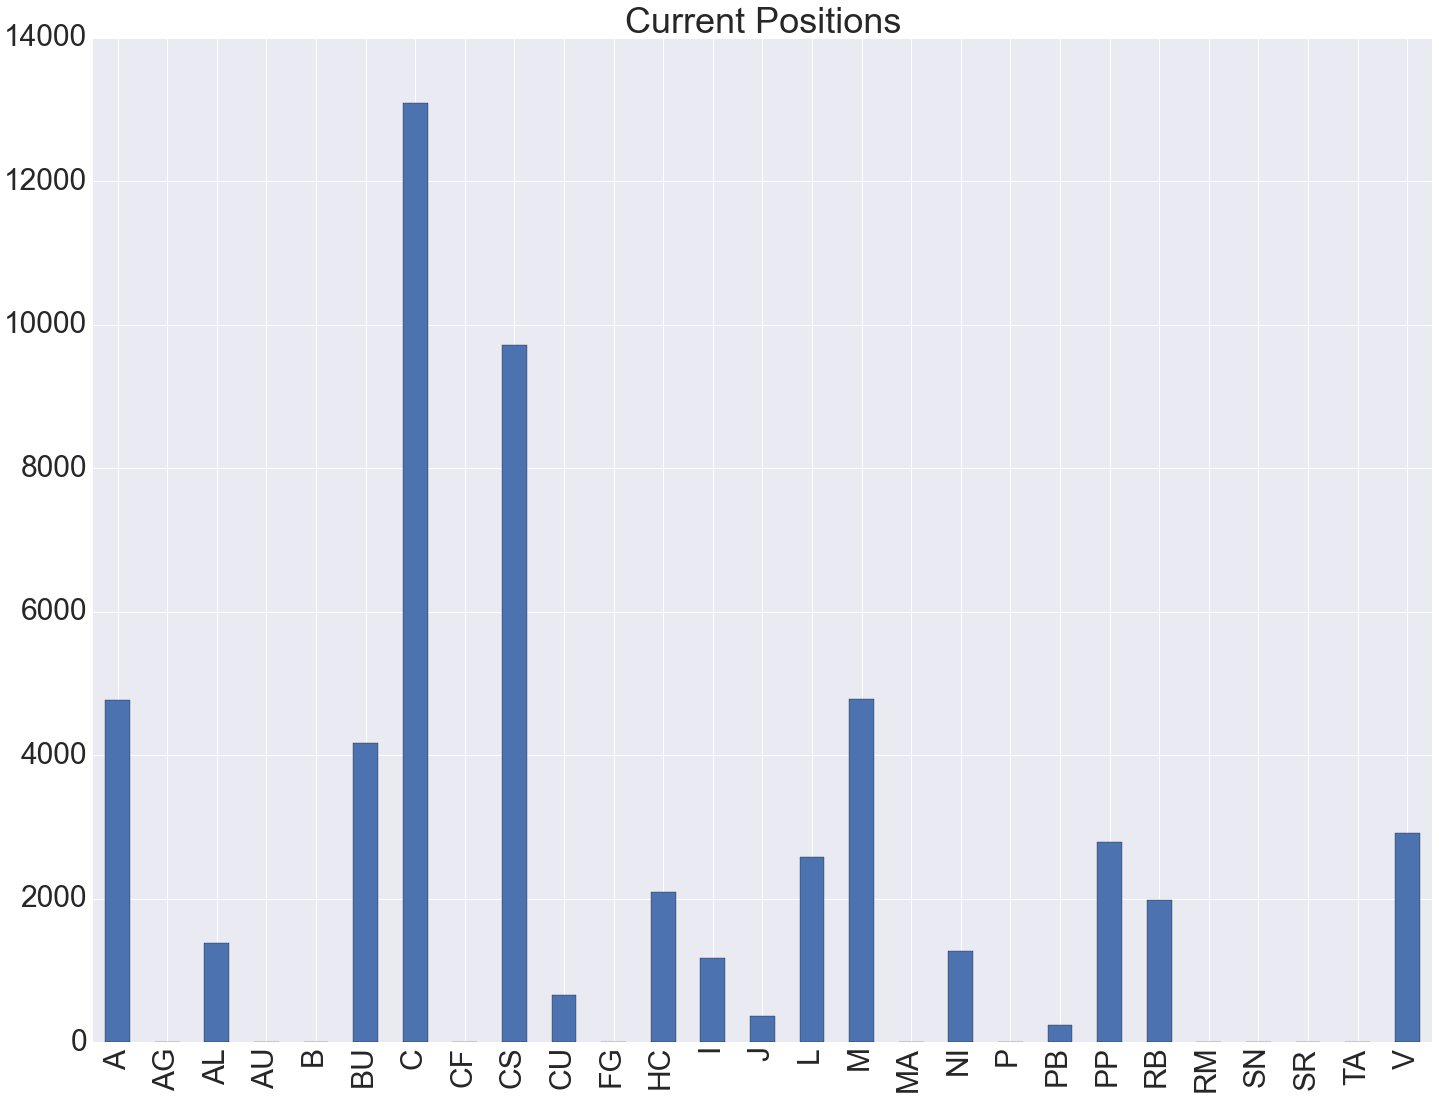

In [5]:
lots.ix[lots.index[-1]].plot(kind='bar',title='Current Positions')

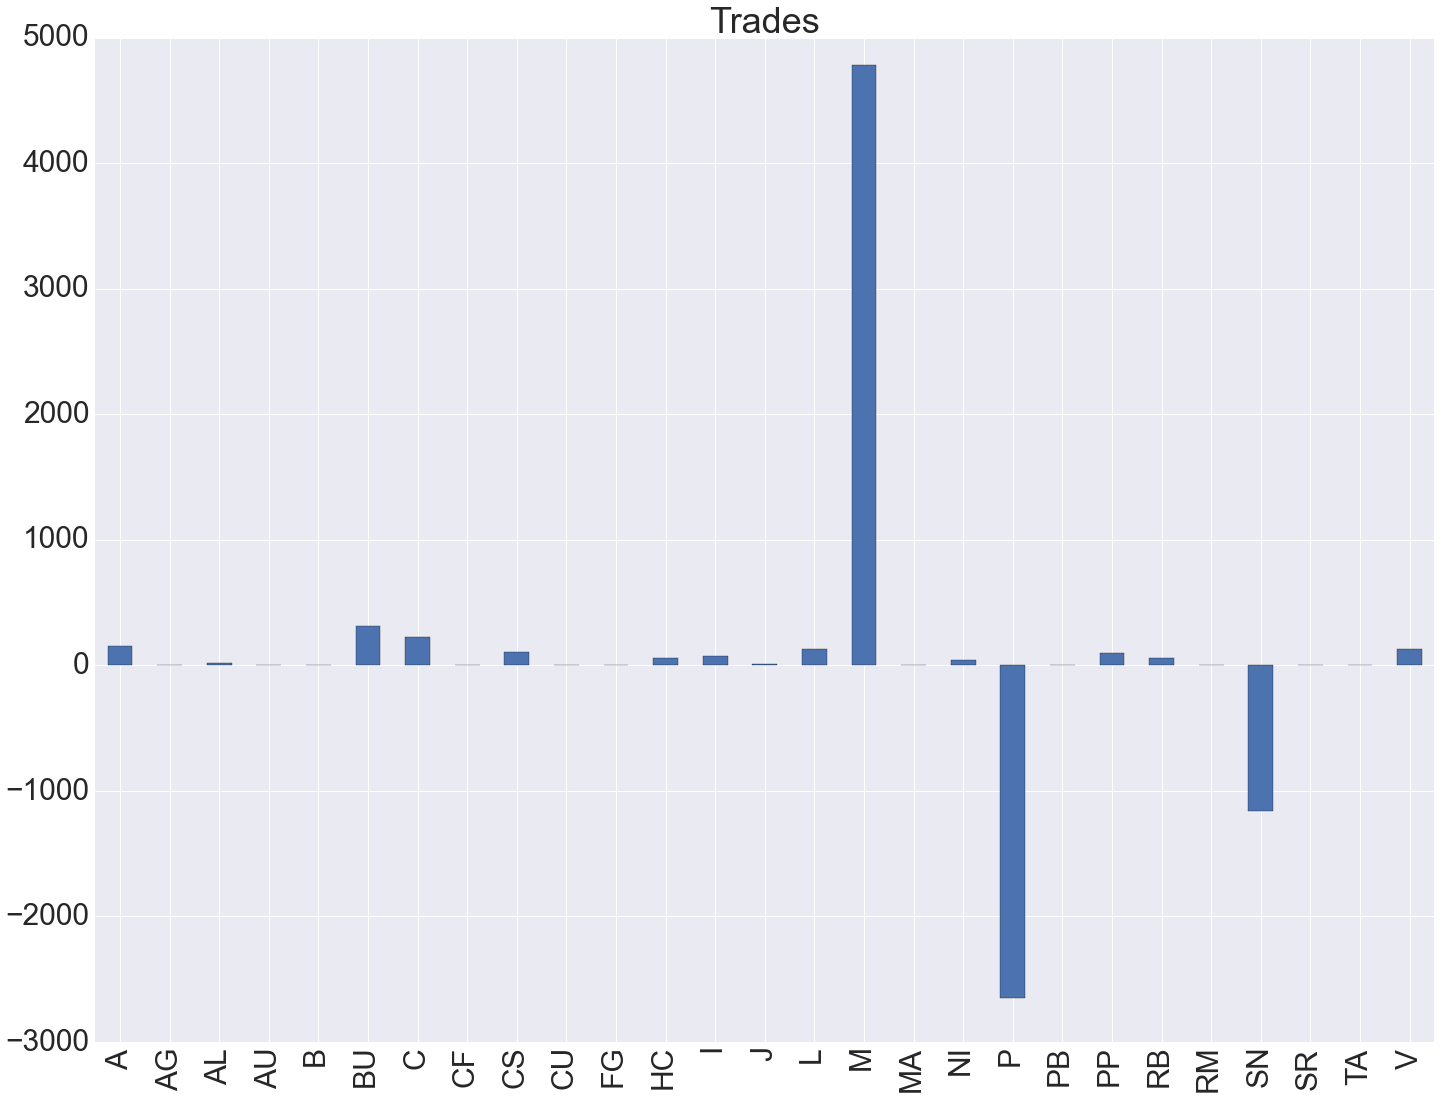

In [6]:
lots.diff().ix[lots.index[-1]].plot(kind='bar',title='Trades')

In [7]:
curr_px=get_most_liquid_price(mkts)
PNL = calc_pnl_position_wc(lots,df,curr_px)

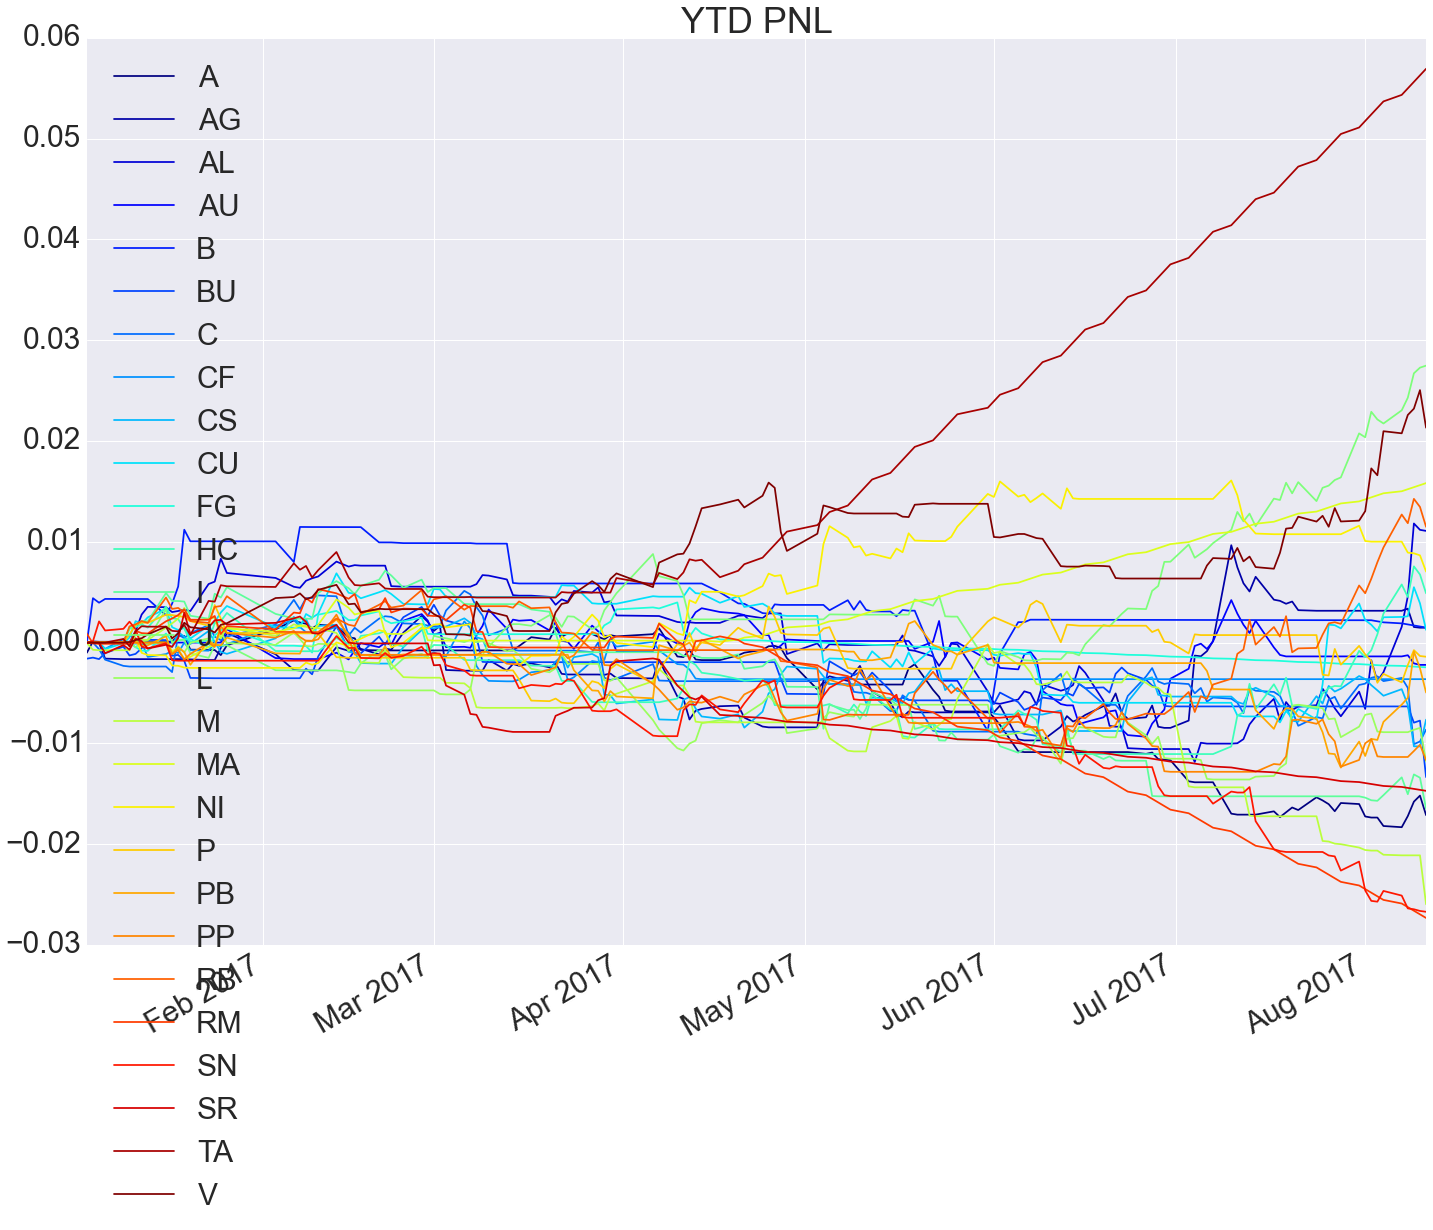

In [8]:
(PNL['2017':].dropna(how='all').ffill()/FundAUM).cumsum().plot(colormap='jet',title='YTD PNL')

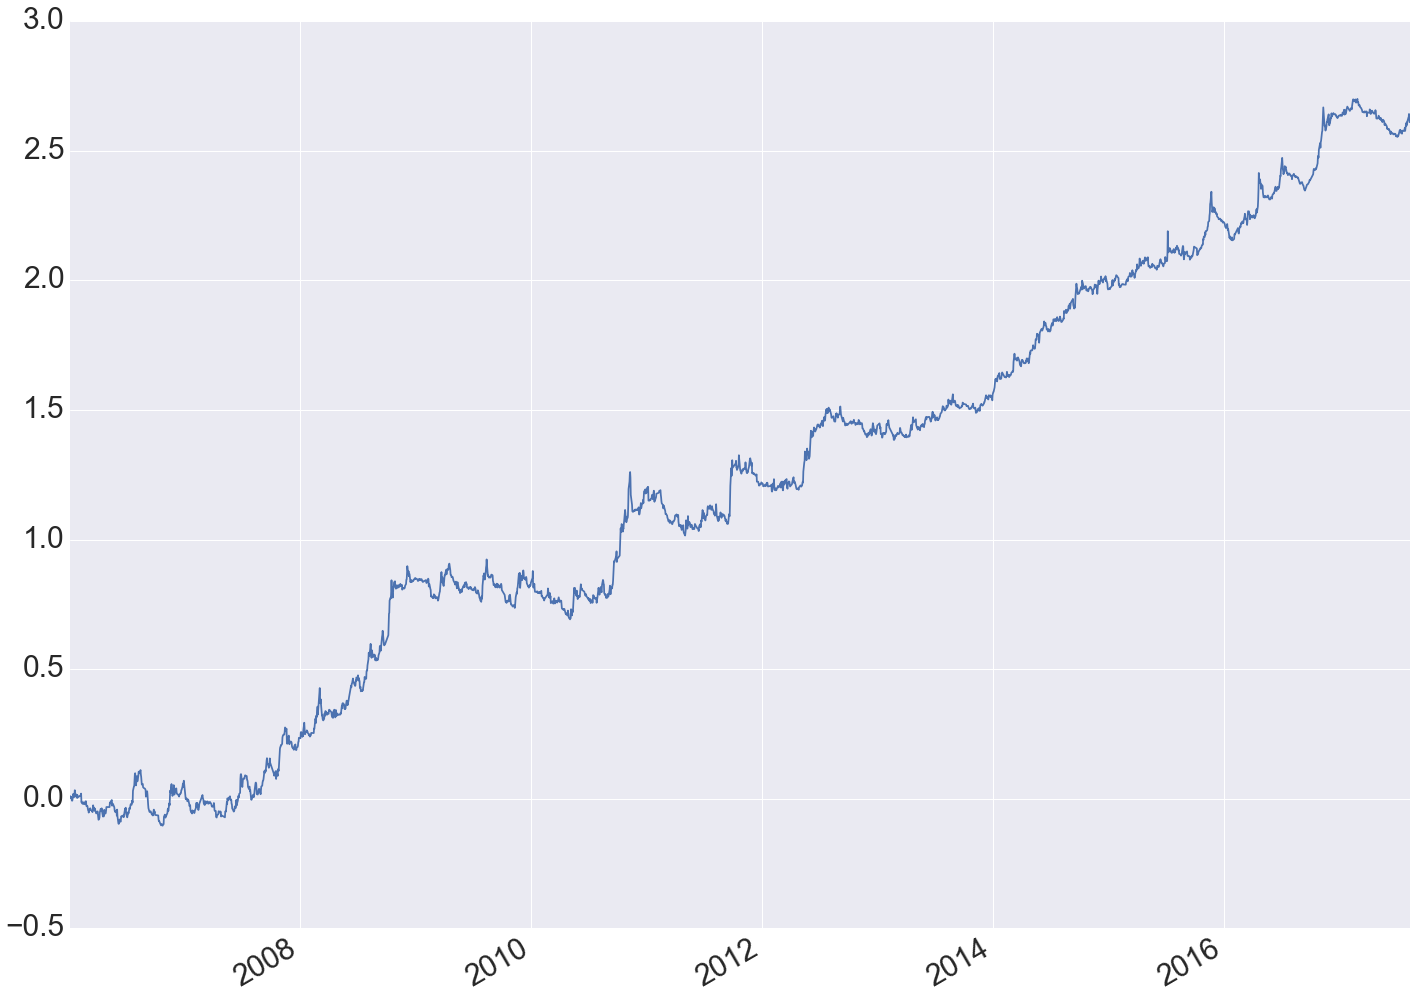

In [59]:
(PNL.sum(axis=1)/FundAUM)['2006':].cumsum().plot()

In [10]:
calc_Sharpe((PNL['2014':].sum(axis=1)/FundAUM))

1.5727733654641838

In [11]:
mkt = 'A'
OI=load_market_open_interest(mkt).dropna(how='all')

In [76]:
def switch_contracts(lots):
    msg =""    
    for mkt in lots.columns:
        OI=load_market_open_interest(mkt).dropna(how='all')
        if OI.size==0:
            continue
        prev_contract = OI.idxmax(axis=1).tail(2).ix[0] 
        today_contract = OI.idxmax(axis=1).tail(2).ix[1]
        if prev_contract != today_contract:
            prev = lots[mkt].tail(2).ix[0]
            today = lots[mkt].tail(2).ix[1]
            msg=msg+ 'SWITCH: ' +str(prev) + ' lots of '  +mkt + ' from: ' + prev_contract + ' to: ' + today_contract +'\n'
    return msg

In [61]:
switch_contracts(lots)

''

In [102]:
def generate_trades(lots):
    trades=lots.diff().ix[lots.index[-1]].dropna()
    for mkt in trades.index:
        contract = get_traded_contract(mkt)
        td =int(trades[mkt]) 
        if  td >0:
            print 'BUY: ' + str(trades[mkt]) + ' of ' + mkt + ' '+ contract
        elif td==0:
            continue
        else:
            print 'SELL: ' + str(trades[mkt]) + ' of ' + mkt + ' '+ contract

In [60]:
generate_trades(lots)

BUY: 156.0 of A F18
SELL: -45.0 of AG M18
BUY: 15.0 of AL X17
SELL: -5.0 of AU Z17
BUY: 311.0 of BU Z17
BUY: 229.0 of C F18
BUY: 105.0 of CS F18
BUY: 55.0 of HC F18
BUY: 78.0 of I F18
BUY: 8.0 of J F18
BUY: 129.0 of L F18
BUY: 5678.0 of M F18
BUY: 44.0 of NI F18
SELL: -3196.0 of P F18
BUY: 98.0 of PP F18
BUY: 56.0 of RB F18
SELL: -1399.0 of SN U17
BUY: 132.0 of V F18


In [108]:
calc_positions_two_lookbacks?

In [56]:
get_market_static_data().T.SR

contract_multiplier             10
exchange                      CZCE
margin_rate                   0.05
product                  Commodity
settlement_method          UNKNOWN
symbol                         白砂�
trading_unit                  null
Description            White Sugar
Name: SR, dtype: object

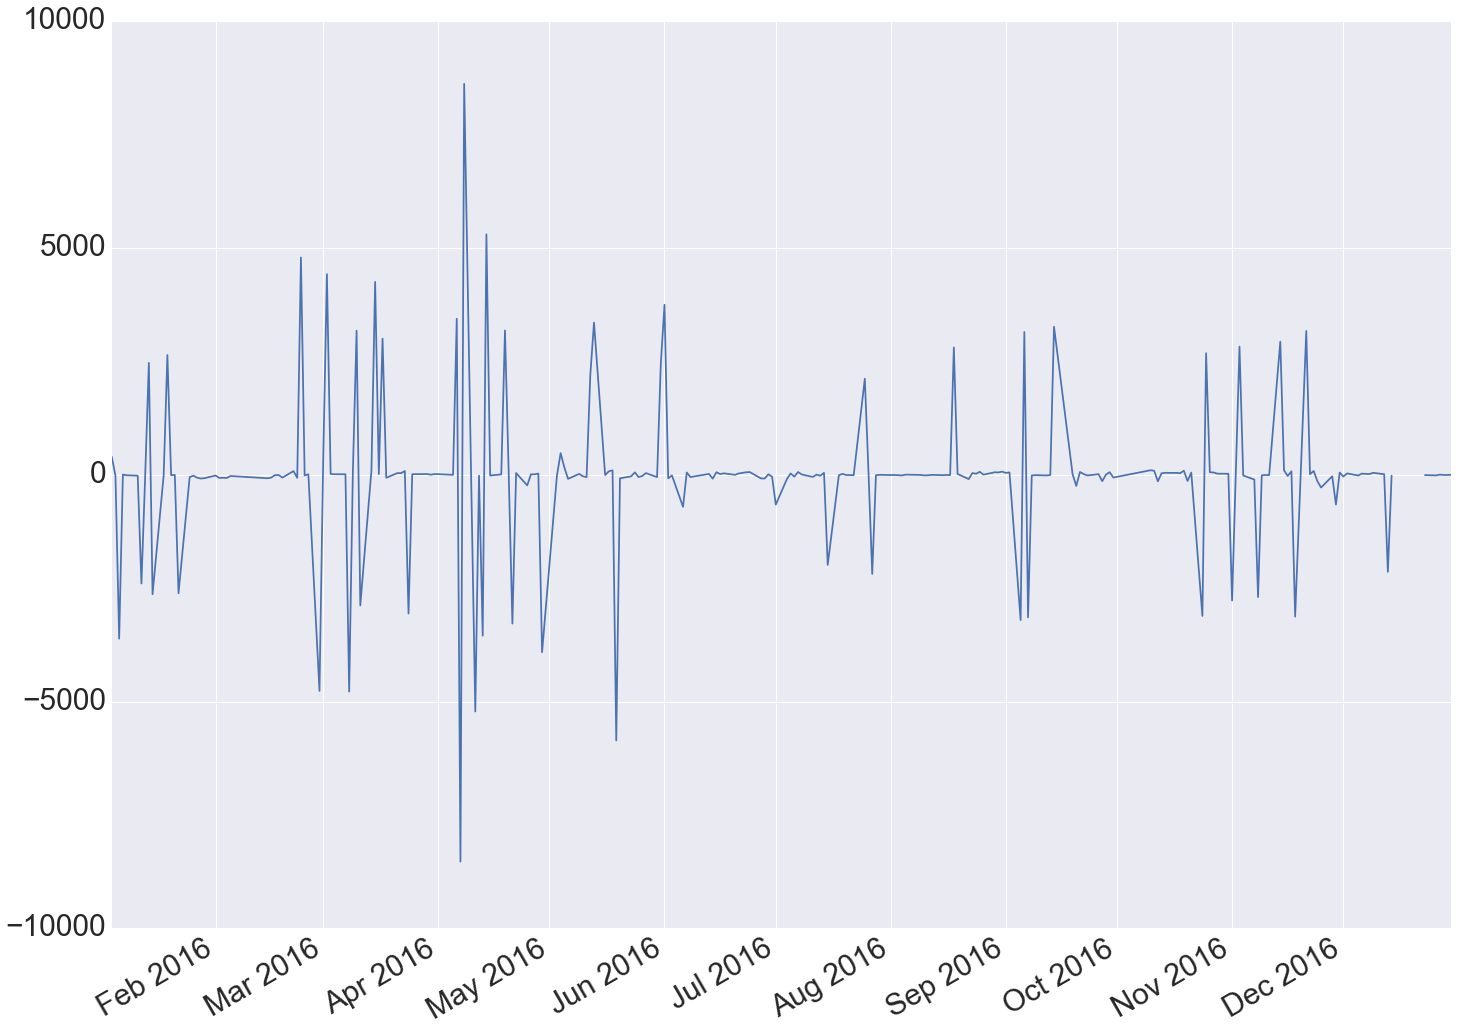

In [62]:
lots.diff()['2016'].SR.plot()

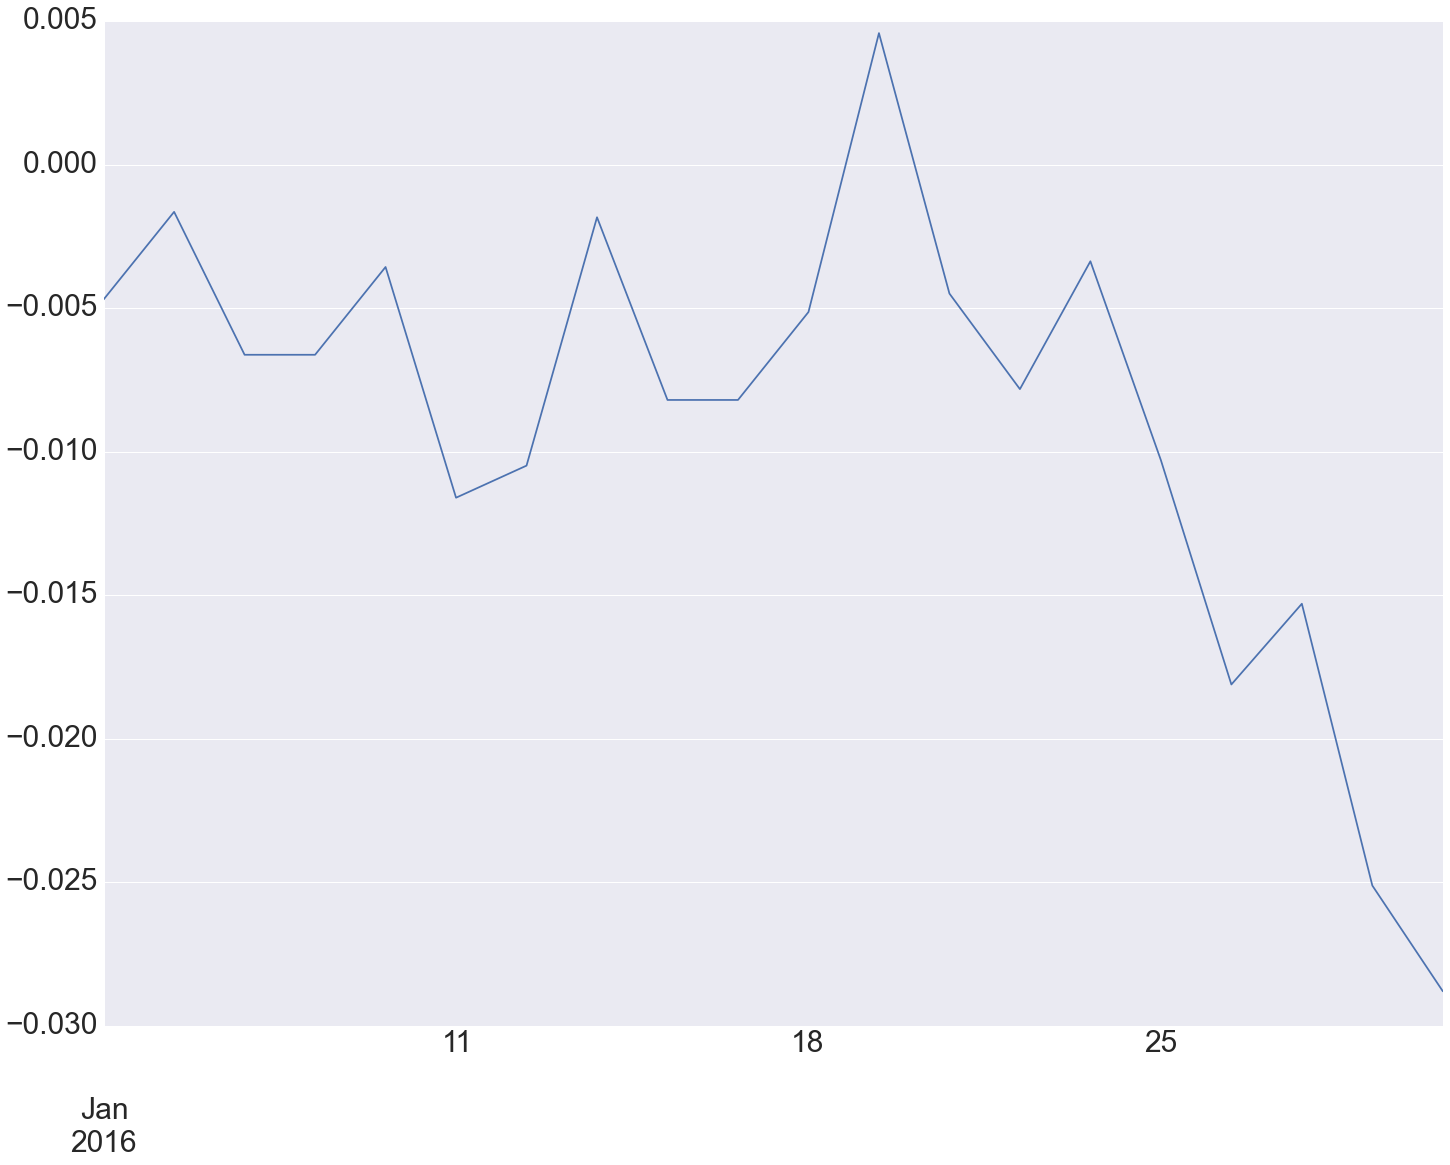

In [19]:
df.A['2016-1'].cumsum().plot()

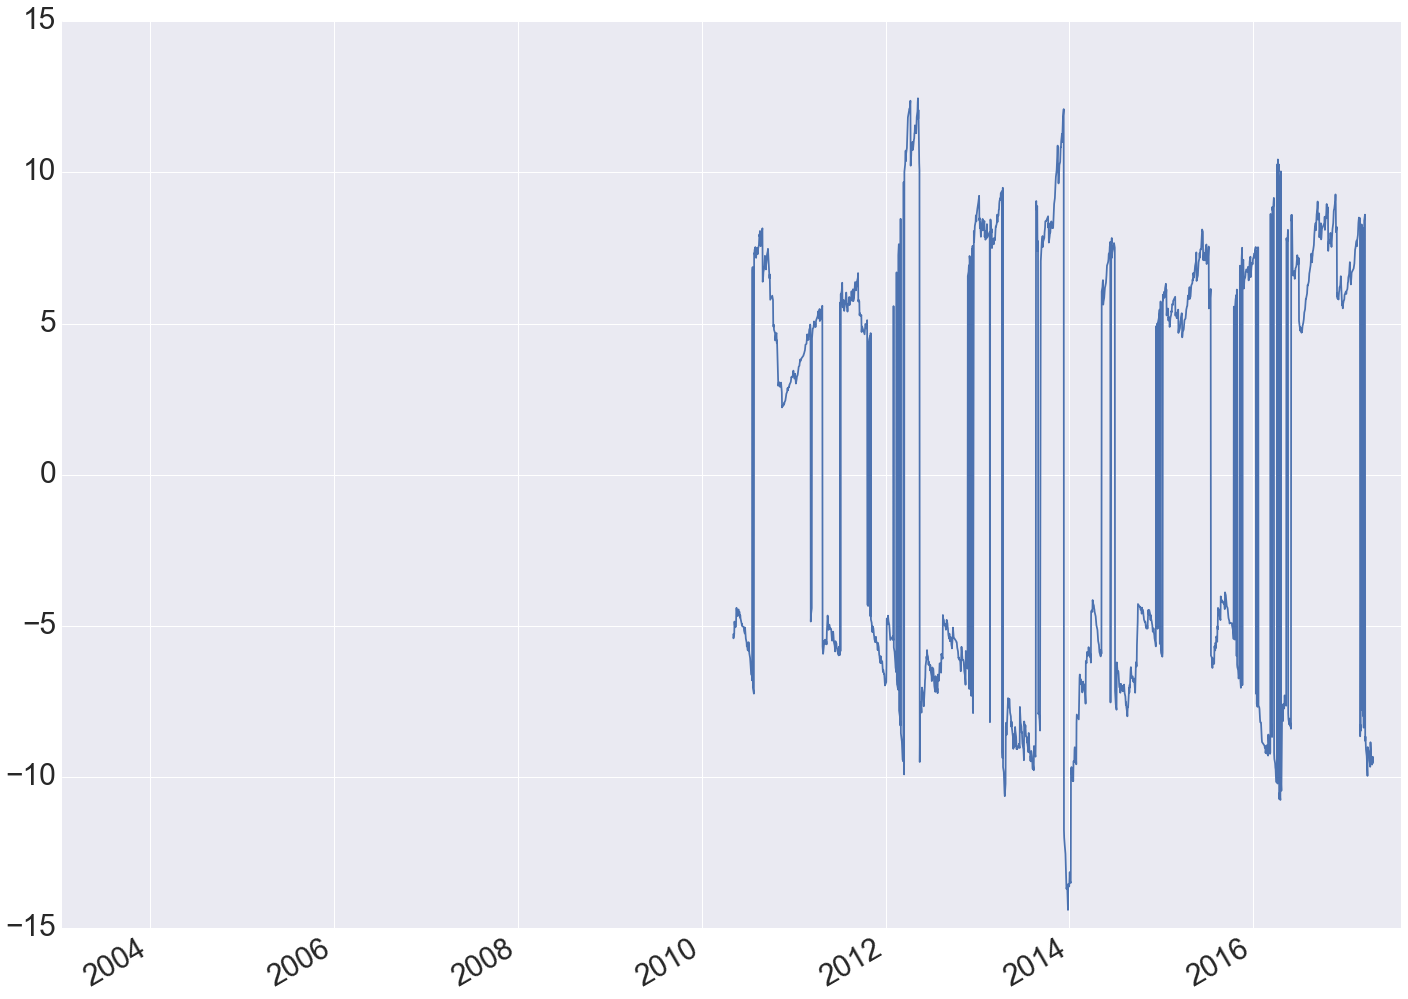

In [71]:
s_long.SR.plot()

# Testing email server

In [17]:
# Import smtplib for the actual sending function
import smtplib

In [34]:
server = smtplib.SMTP('smtp.live.com', 587)
server.starttls()
server.ehlo()


(250,
 'BLU436-SMTP59.smtp.hotmail.com Hello [90.197.67.53]\nTURN\nSIZE 41943040\nETRN\nPIPELINING\nDSN\nENHANCEDSTATUSCODES\n8bitmime\nBINARYMIME\nCHUNKING\nVRFY\nAUTH LOGIN PLAIN XOAUTH2\nOK')

In [ ]:
# Import the email modules we'll need
from email.mime.text import MIMEText

In [13]:
# Import smtplib for the actual sending function
import smtplib

# Import the email modules we'll need
from email.mime.text import MIMEText

textfile='model.py'
me='mrefermat@hotmail.com'
you=me

# Open a plain text file for reading.  For this example, assume that
# the text file contains only ASCII characters.
fp = open(textfile, 'rb')
# Create a text/plain message
msg = MIMEText(fp.read())
fp.close()

# me == the sender's email address
# you == the recipient's email address
msg['Subject'] = 'The contents of %s' % textfile
msg['From'] = me
msg['To'] = you

# Send the message via our own SMTP server, but don't include the
# envelope header.
s = smtplib.SMTP('localhost')
s.sendmail(me, [you], msg.as_string())
s.quit()

error: [Errno 61] Connection refused